In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [2]:
df_desharnais = pd.read_excel("fp.xlsx",  header=0)
df_desharnais.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [3]:
df_desharnais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               81 non-null     int64
 1   Project          81 non-null     int64
 2   TeamExp          81 non-null     int64
 3   ManagerExp       81 non-null     int64
 4   YearEnd          81 non-null     int64
 5   Length           81 non-null     int64
 6   Effort           81 non-null     int64
 7   Transactions     81 non-null     int64
 8   Entities         81 non-null     int64
 9   PointsNonAdjust  81 non-null     int64
 10  Adjustment       81 non-null     int64
 11  PointsAjust      81 non-null     int64
 12  Language         81 non-null     int64
dtypes: int64(13)
memory usage: 8.4 KB


In [4]:
df_desharnais.describe()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,41.000000,2.185185,2.530864,85.740741,11.666667,5046.308642,182.123457,122.333333,304.456790,27.629630,289.234568,1.555556
std,23.526581,23.526581,1.415195,1.643825,1.222475,7.424621,4418.767228,144.035098,84.882124,180.210159,10.591795,185.761088,0.707107
min,1.000000,1.000000,-1.000000,-1.000000,82.000000,1.000000,546.000000,9.000000,7.000000,73.000000,5.000000,62.000000,1.000000
25%,21.000000,21.000000,1.000000,1.000000,85.000000,6.000000,2352.000000,88.000000,57.000000,176.000000,20.000000,152.000000,1.000000
50%,41.000000,41.000000,2.000000,3.000000,86.000000,10.000000,3647.000000,140.000000,99.000000,266.000000,28.000000,255.000000,1.000000
75%,61.000000,61.000000,4.000000,4.000000,87.000000,14.000000,5922.000000,224.000000,169.000000,384.000000,35.000000,351.000000,2.000000
max,81.000000,81.000000,4.000000,7.000000,88.000000,39.000000,23940.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000,3.000000


In [5]:
df_desharnais.corr()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
id,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
Project,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
TeamExp,-0.006007,-0.006007,1.000000,0.424687,-0.210335,0.143948,0.119529,0.103768,0.256608,0.203805,0.235629,0.222884,-0.079112
ManagerExp,0.214294,0.214294,0.424687,1.000000,-0.011519,0.211324,0.158303,0.138146,0.206644,0.207748,-0.066821,0.187399,0.205521
YearEnd,0.096486,0.096486,-0.210335,-0.011519,1.000000,-0.095027,-0.048367,0.034331,0.001686,0.028234,-0.056743,0.012106,0.342233
Length,0.255187,0.255187,0.143948,0.211324,-0.095027,1.000000,0.693280,0.620711,0.483504,0.723849,0.266086,0.714092,-0.023810
Effort,0.126153,0.126153,0.119529,0.158303,-0.048367,0.693280,1.000000,0.581881,0.510328,0.705449,0.463865,0.738271,-0.261942
Transactions,0.265891,0.265891,0.103768,0.138146,0.034331,0.620711,0.581881,1.000000,0.185041,0.886419,0.341906,0.880923,0.136778
Entities,0.028787,0.028787,0.256608,0.206644,0.001686,0.483504,0.510328,0.185041,1.000000,0.618913,0.234747,0.598401,-0.056439
PointsNonAdjust,0.226076,0.226076,0.203805,0.207748,0.028234,0.723849,0.705449,0.886419,0.618913,1.000000,0.383842,0.985945,0.082737


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

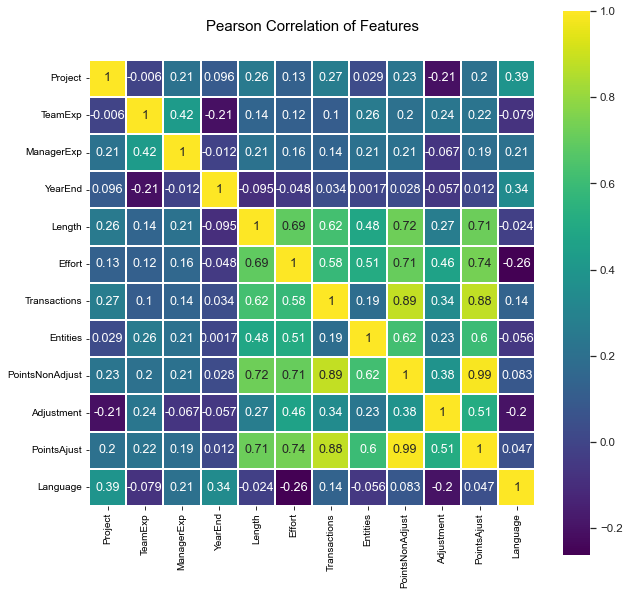

In [6]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(df_desharnais.drop(['id'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

In [7]:
features = [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']

max_corr_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

X = df_desharnais[max_corr_features]
y = df_desharnais['Effort']

### KNN Algorithms

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)
neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train) 
predict = neigh.predict(X_test)
print(neigh.score(X_test, y_test))
print("Root mean square: ", np.sqrt(mean_squared_error(y_test, predict)))
print("Mean Absolute error", mean_absolute_error(y_test, predict))

0.7379861869550943
Root mean square:  1755.1136797388895
Mean Absolute error 1325.814814814815


### Linear Regression

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
predict = lr_model.predict(X_test)
print(lr_model.score(X_test, y_test))
print("Root mean square: ", np.sqrt(mean_squared_error(y_test, predict)))
print("Mean Absolute error", mean_absolute_error(y_test, predict))

0.7680074954440711
Root mean square:  2680.120730048882
Mean Absolute error 2024.8688898743294


### RandomForestRegressor

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
for i in np.arange(100,1100,100):
    regressor = RandomForestRegressor(n_estimators=i,max_features=5)
    regressor.fit(X_train, y_train)
    predict = regressor.predict(X_test)
    print(regressor.score(X_test, y_test))
    print("Root mean square: ", np.sqrt(mean_squared_error(y_test, predict)))
    print("Mean Absolute error", mean_absolute_error(y_test, predict))

0.4629842200679467
Root mean square:  2595.9804603962757
Mean Absolute error 1865.5033333333336
0.45243273927476424
Root mean square:  2621.359784042682
Mean Absolute error 1850.647777777778
0.4629138877360329
Root mean square:  2596.150451100906
Mean Absolute error 1863.1604938271603
0.45430024298617067
Root mean square:  2616.885831154243
Mean Absolute error 1861.869814814815
0.44922608395103103
Root mean square:  2629.0241636865385
Mean Absolute error 1863.3810370370368
0.42519118266192013
Root mean square:  2685.774872003323
Mean Absolute error 1892.4209259259258
0.4593933488019758
Root mean square:  2604.645289965745
Mean Absolute error 1839.1851851851852
0.43773455025790586
Root mean square:  2656.309004041864
Mean Absolute error 1878.152916666667
0.4581341916987357
Root mean square:  2607.676838063997
Mean Absolute error 1857.714609053498
0.44820176134959555
Root mean square:  2631.4677415934207
Mean Absolute error 1856.349666666667


### Support Vector Regressor

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma':('auto', 'scale')}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters, cv=3)
LinearSVC.fit(X_train, y_train)
print("Best params hash: {}".format(LinearSVC.best_params_))
print(LinearSVC.score(X_test, y_test))

Best params hash: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.735919788126071


### Pickle Model

In [12]:
import pickle

In [13]:
filename = 'trained_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))

In [17]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

### Prediction Function

In [18]:
#'Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust'

input_data = (12,253,52,305, 302)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr_model.predict(input_data_reshaped)
print(prediction)

if (prediction > 0):
  print('Cost of the Prediction: ', prediction)
else:
  print('Error Occured')

[4995.09702614]
Cost of the Prediction:  [4995.09702614]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
